# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [2]:
"""
Load the data.
"""

hash_value = 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89'
bin_size = '400'
file = 'data/C2A2_data/BinnedCsvs_d{}/{}.csv'.format(bin_size, hash_value)

df = pd.read_csv(file)
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [3]:
"""
Remove February 29 from all years and all weather stations.
"""

df1 = df[~df['Date'].str.endswith('02-29')].copy()

In [4]:
"""
Add month and day columns.
"""

df1['Month'] = df1['Date'].str.slice(5,7)
df1['Day'] = df1['Date'].str.slice(-2)
df1.head()

,ID,Date,Element,Data_Value,Month,Day
0,USW00094889,2014-11-12,TMAX,22,11,12
1,USC00208972,2009-04-29,TMIN,56,04,29
2,USC00200032,2008-05-26,TMAX,278,05,26
3,USC00205563,2005-11-11,TMAX,139,11,11
4,USC00200230,2014-02-27,TMAX,-106,02,27


In [5]:
"""
Split the dataframe for prior to 2015 and after 2015.
"""

df_prior = df1[df1['Date']<'2015-01-01']
df_after = df1[df1['Date']>'2014-12-31']

In [6]:
df_after['Date'].describe()

count          13757
unique           365
top       2015-05-03
freq              40
Name: Date, dtype: object

In [7]:
"""
Now, for each day amongst all years from 2005-2014 and all weather 
station, find the max temp.
"""

prior_max_group = df_prior[df_prior['Element']=='TMAX'].groupby(['Month', 'Day'])
prior_max_ser = prior_max_group['Data_Value'].max()/10
prior_max_ser.head()

Month  Day
01     01     15.6
       02     13.9
       03     13.3
       04     10.6
       05     12.8
Name: Data_Value, dtype: float64

In [8]:
prior_max_ser.describe()

count    365.000000
mean      25.864932
std        9.022784
min        6.700000
25%       18.300000
50%       27.800000
75%       33.300000
max       40.600000
Name: Data_Value, dtype: float64

In [9]:
"""
Find the min temp.
"""

prior_min_group = df_prior[df_prior['Element']=='TMIN'].groupby(['Month', 'Day'])
prior_min_ser = prior_min_group['Data_Value'].min()/10
prior_min_ser.head()

Month  Day
01     01    -16.0
       02    -26.7
       03    -26.7
       04    -26.1
       05    -15.0
Name: Data_Value, dtype: float64

In [10]:
"""
Do the same for the 2015 dataframe.  Find max.
"""

after_max_group = df_after[df_after['Element']=='TMAX'].groupby(['Month', 'Day'])
after_max_ser = after_max_group['Data_Value'].max()/10
after_max_ser.head()

Month  Day
01     01     1.1
       02     3.9
       03     3.9
       04     4.4
       05     2.8
Name: Data_Value, dtype: float64

In [11]:
after_max_df = pd.DataFrame(after_max_ser)

In [12]:
after_max_df.describe()

,Data_Value
count,365.000000
mean,18.750137
std,11.478098
min,-12.100000
25%,10.000000
50%,20.600000
75%,28.300000
max,36.100000


In [13]:
"""
Find where 2015 max values best record values from prior years.
"""

Max_2015 = after_max_df['Data_Value'] > prior_max_ser
after_max_df['Record'] = Max_2015

In [14]:
new_index = pd.date_range('2015-01-01', '2015-12-31', freq='D')
after_max_df = after_max_df.set_index(new_index)

In [15]:
after_max_df.head()

,Data_Value,Record
2015-01-01,1.1,False
2015-01-02,3.9,False
2015-01-03,3.9,False
2015-01-04,4.4,False
2015-01-05,2.8,False


In [16]:
"""
Find min.
"""

after_min_group = df_after[df_after['Element']=='TMIN'].groupby(['Month', 'Day'])
after_min_ser = after_min_group['Data_Value'].min()/10
after_min_ser.head()

Month  Day
01     01    -13.3
       02    -12.2
       03     -6.7
       04     -8.8
       05    -15.5
Name: Data_Value, dtype: float64

In [17]:
after_min_df = pd.DataFrame(after_min_ser)
print(after_min_df.describe())

       Data_Value
count  365.000000
mean     0.101096
std     11.450546
min    -34.300000
25%     -6.100000
50%      1.100000
75%     10.000000
max     17.800000


In [18]:
"""
Find where 2015 min values best record values from prior years.
"""

Min_2015 = after_min_ser < prior_min_ser
after_min_df['Record'] = Min_2015

In [19]:
print(after_min_df.head())
print(after_min_df.shape)

           Data_Value Record
Month Day                   
01    01        -13.3  False
      02        -12.2  False
      03         -6.7  False
      04         -8.8  False
      05        -15.5   True
(365, 2)


In [20]:
after_min_df = after_min_df.set_index(new_index)

<IPython.core.display.Javascript object>


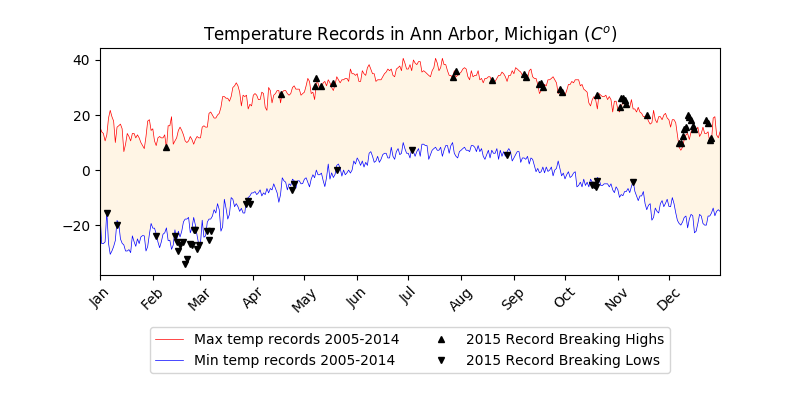

In [21]:
"""
We have all of series that are required.  Create an array with 365 values
for all days of the year.
"""

import matplotlib.dates as mdates
%matplotlib notebook

x_axis = pd.date_range('2015-01-01', '2015-12-31', freq='D')

fig = plt.figure(figsize=(8,4))

ax=plt.gca()

# Create the plots
plt.plot(x_axis, prior_max_ser, 'r-', lw=0.5, label='Max temp records 2005-2014')
plt.plot(x_axis, prior_min_ser, 'b-', lw=0.5, label='Min temp records 2005-2014')
plt.gca().fill_between(x_axis, prior_max_ser, prior_min_ser, 
                       facecolor='orange', alpha=0.10)
plt.plot(after_max_df.index[after_max_df['Record']==True], after_max_df['Data_Value']
         [after_max_df['Record']==True], 'k^', ms=4, label='2015 Record Breaking Highs')
x=ax.xaxis
plt.plot(after_min_df.index[after_min_df['Record']==True], after_min_df['Data_Value']
         [after_min_df['Record']==True], 'kv', ms=4, label='2015 Record Breaking Lows')
for item in x.get_ticklabels():
    item.set_rotation(45)
plt.subplots_adjust(bottom=0.25)  
plt.margins(x=0)

formatter = mdates.DateFormatter("%b")
ax.xaxis.set_major_formatter(formatter)
ax.set_title('Temperature Records in Ann Arbor, Michigan ($C^o$)')
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20),
          fancybox=True, ncol=2)